ENPH 252/PHYS 250 2022W Assignment 2
====================================
* Reply by completing this notebook, then submit it to onQ as an .ipnyb (not as a .pdf).  Document all answers.  Reply in a cell beneath each question, with comments in your code, and with illustrations including labels and titles.


* This is open book, and you can work on this with others, but what you submit must reflect your individual work and not be copied from other sources (use of original variable names is recommended).  Rename notebook to YOURLASTNAME.ipynb before submitting.

Student last name and name:
-------------------------
Grade /100:
----------

Q1) (40 pts) Error propagation
-- 
You may recall the classic formula for an ideal gas from your hischool chemistry class: $PV=nRT$ where $P$ is the pressure of a gas, $V$ is the volume the gas occupies, $n$ is the number of gas molecules in moles, $R$ is the ideal gas constant, and $T$ is the temperature of the gas. This formula describes an ideal gas where the particles are nonineractive and do not take up space themselves. This equation can be modified to account for these factors in the following way:

$(P+\frac{a}{v^2})(V-nb) = nRT$

where $v = \frac{V}{n}$, is the molar volume of a gas particle and $a$ and $b$ are constants. This formula, known as van der Waals equation, can be rearranged to solve for the pressure of a system in the following way:

$P = \frac{RT}{v-b} -\frac{a}{v^2}$

Physicists carefully measure and determine values and uncertainties for <i>a</i>, $b$, and $v$ corresponding to an unknown gas: $a = 1.4 \pm 0.2$ bar*L<sup>2</sup>/mol<sup>2</sup>, $b = 0.032 \pm 0.015$ L/mol, and $v = 22.4 \pm 0.5$ L/mol.

The ideal gas constant, $R = 8.31446 \times 10^{-2}$ bar*L/(K*mol) and temperature $T = 200.0$ K are well known such that their uncertainty is insignificant. 

Using the sympy library and the rearranged van der Waals equation, determine $P$, its error, and its relative error, in units of bar.  Display all steps clearly. Assume the fluctuations of $a$, $b$, and $v$ are Gaussian and independent of one another. 

In [29]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import uniform
v,b,a, R, T = sym.symbols('v b a R T')
P = (R*T)/(v-b)-a/(v**2)
  
p = P.subs({v:22.4,b:0.032,a:1.4,R:r,T:t})
dPdv = sym.diff(P,v)
dPdb = sym.diff(P,b)
dPda = sym.diff(P,a)
sig_v, sig_b, sig_a = sym.symbols('\sigma_v \sigma_b \sigma_a')
sig_P = sym.sqrt(sig_v*dPdv**2+sig_b*dPdb**2+sig_a*dPda**2)
sym.simplify(sig_P)
val = [(v, 22.4), (b, 0.032), (a, 1.4), (R, 8.31446*10**-2), (T, 200), (sig_v, 0.5), (sig_b, 0.032), (sig_a, 0.2)]
print("P =", sym.N(P.subs(val)), "+/-", sym.N(sig_P.subs(val)))
print("Relative Error =", sym.N(sig_P.subs(val)/P.subs(val))*100, "%")

P = 0.740634356478643 +/- 0.0240875960714654
Relative Error = 3.25229255985237 %


Q2) Statistics
--

Q2.1) (10 pts) Using the scipy.stats library, draw $n=10^4$ events from a uniform distribution spanning $a=10$ to $b=30$.

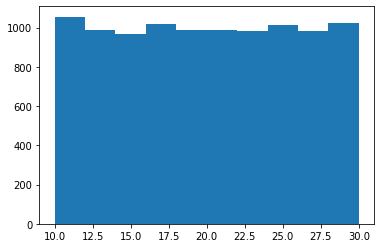

In [40]:
n = 10**4
uniformArr = uniform.rvs(loc=10, scale=20, size=n)


Q2.2) (10 pts) Using numpy libraries, determine the average and standard deviation of the events drawn earlier.

In [42]:
average = np.mean(uniformArr)
stdDev = np.std(uniformArr, ddof=1)
print("Average =", average)
print("Standard Deviation =", stdDev)

Average = 19.982401154946874
Standard Deviation = 5.81020634214779


Q2.3) (10 pts) Using the matplotlib library, plot the distribution of these events, in terms of counts per bin, using 100 bins over the range 5-35.

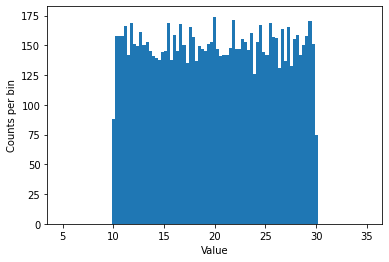

In [48]:
bin = np.linspace(5, 35, 100, endpoint=True)
plt.hist(uniformArr, bins=bin)
plt.xlabel("Value")
plt.ylabel("Counts per bin")
plt.show()

Q2.4) (10 pts) Overlay the count distribution of the original distribution (pdf scaled by number of counts and bin width).

Q.2.5) (10 pts) Now draw $m=10000$ groups of $n=2$ events from the same uniform distribution as earlier.  For each group of $n$, calculate the sum and the variance.  Plot the probability density of the averages.

Q.2.6) (10 pts) Repeat the previous question for $m=10000$ groups of $n=100$ events.  Overlay a gaussian pdf of mean $20 n$ and standard deviation $(b-a) \sqrt{n/12}$.  What do you notice?  Conclude.